Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the mnist data 

In [2]:
(x_train , y_train), ( x_test , y_test)= mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape , y_train.shape,x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Training data ----> 60,000 images

test data ----> 10,000 images

Images dimension --->28x28

    greyscales iamges--->1 channel

In [5]:
#printing 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


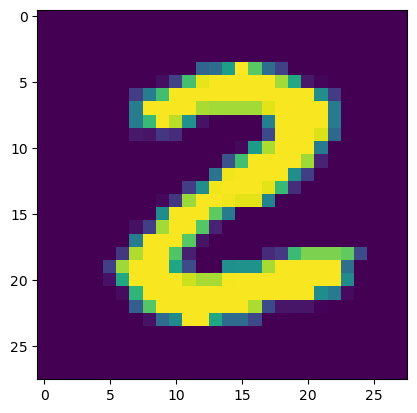

2


In [7]:
#displaying the image 
plt.imshow(x_train[25])
plt.show()

#printing the corrresponding label 
print(y_train[25])

Images Lables

In [8]:
print(y_train.shape , y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in y_train
print(np.unique(y_train))
#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in the dataset , If not, we have to resize all the images to a common dimension 

#scaling the values

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
#seting up the layes of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50 ,activation = 'relu'),
    keras.layers.Dense(50 ,activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
#training the neural network
model.fit(x_train , y_train , epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1445 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0718 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

Training data accuracy is 98.81%

In [15]:
loss , accuracy = model.evaluate(x_test ,y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9709


Accuracy on testing data is 97.49%

In [16]:
print(x_test.shape)

(10000, 28, 28)


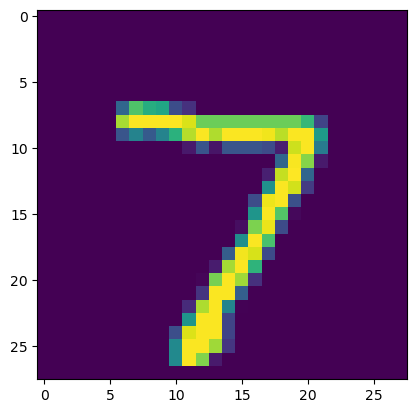

In [17]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_predict = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [20]:
print(y_predict.shape)

(10000, 10)


In [21]:
print(y_predict[0])

[2.3020254e-02 2.7469813e-04 2.9139334e-02 3.6934394e-01 7.6292658e-08
 2.1986216e-02 1.9868402e-09 9.9999923e-01 6.8045285e-04 2.3893104e-01]


model.predict() gives the prediction probability of each class for that data point

In [22]:
#converting the prediction probabilities to classs label
label_for_first_image= np.argmax(y_predict[0])
print(label_for_first_image)

7


In [23]:
#converting the prediction probability to class label for all test data points
y_predict_labels = [np.argmax(i) for i in y_predict]
print(y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 4, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test--->true lables

y_predict_labels---->predicted labels

Building the confusion matrix

In [24]:
conf_mat = confusion_matrix(y_test , y_predict_labels)

In [25]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    1,    2,    3,    1,    2,    0],
       [   0, 1115,    3,    3,    0,    1,    3,    2,    8,    0],
       [   6,    0, 1001,    6,    2,    0,    2,    5,   10,    0],
       [   0,    0,    6,  984,    0,    8,    0,    5,    2,    5],
       [   2,    0,    2,    0,  965,    5,    2,    1,    1,    4],
       [   3,    0,    0,   11,    1,  864,    3,    1,    7,    2],
       [   6,    2,    1,    1,    5,    4,  936,    0,    3,    0],
       [   0,    6,    7,    8,    3,    0,    0,  997,    2,    5],
       [   2,    0,    3,   10,    6,   11,    3,    4,  931,    4],
       [   2,    3,    0,    8,   32,    5,    1,    9,    3,  946]])>

Text(0.5, 47.7222222222222, 'Predicted Labels')

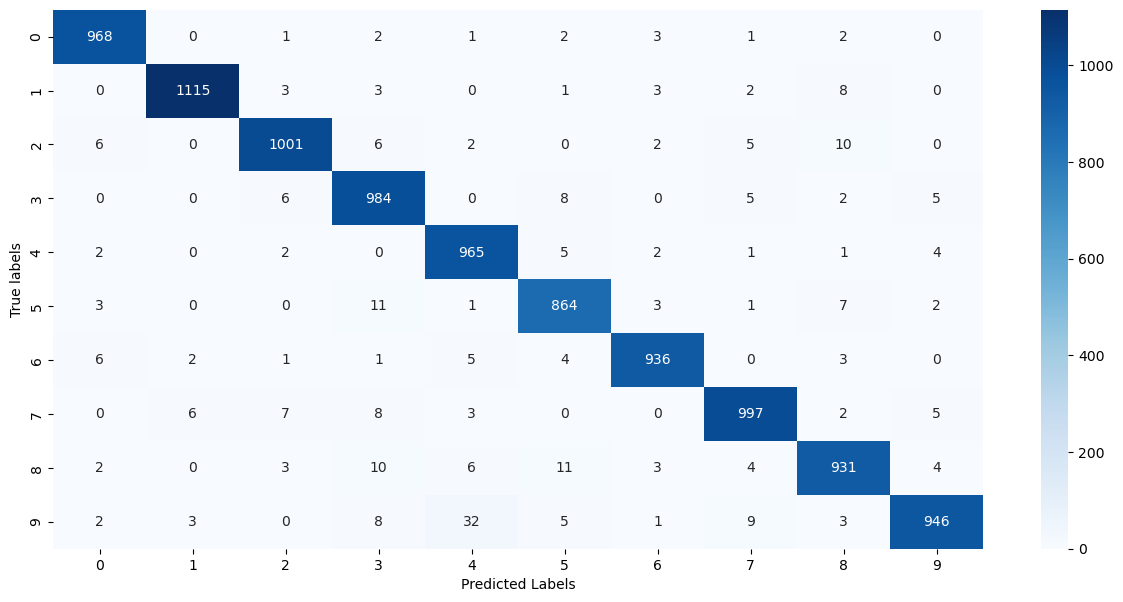

In [26]:
#making a heatmmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat ,annot = True , fmt='d' , cmap = 'Blues')
plt.ylabel("True labels")
plt.xlabel('Predicted Labels')

Building a predictive system

In [27]:
input_img_path="C:/Users/shrut/Downloads/MNIST_digit.png"
input_image= cv2.imread(input_img_path)

In [28]:
type(input_image)

numpy.ndarray

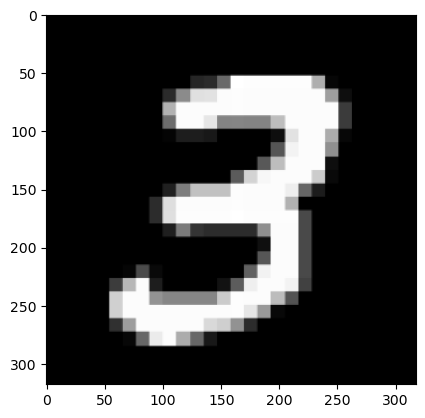

In [29]:
plt.imshow(input_image)

In [30]:
input_image.shape #consider as A RGB IMAGE

(318, 318, 3)

In [31]:
#chnage into greayscale and resize it to 28 x 28

grayscale= cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

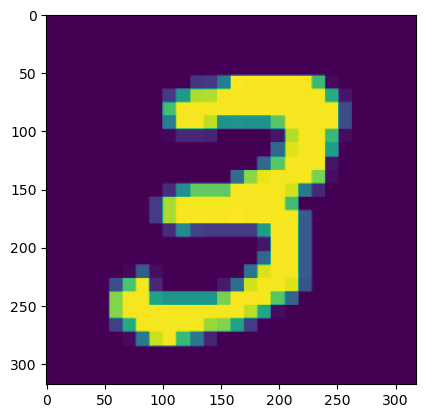

In [32]:
plt.imshow(grayscale)

In [33]:
grayscale.shape

(318, 318)

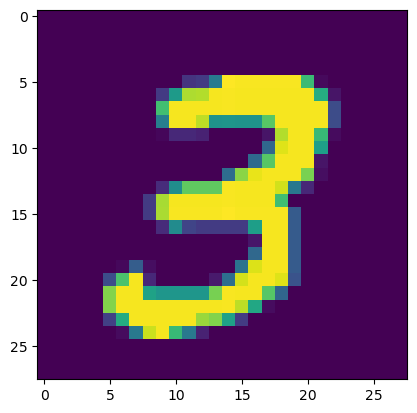

In [34]:
#input_img resize 
input_img_resize = cv2.resize(grayscale ,(28,28))
plt.imshow(input_img_resize)

In [35]:
input_img_resize.shape

(28, 28)

In [36]:
#scaling the image 
input_img_resize= input_img_resize/255

In [37]:
input_reshaped = np.reshape(input_img_resize,[1,28,28])

In [38]:
input_prediction = model.predict(input_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)


1/1 [==============================] - 0s 20ms/step
[[5.0218659e-06 6.0307208e-05 2.9023288e-06 1.0000000e+00 1.4141942e-18
  9.2861700e-01 1.1337616e-09 1.0238985e-05 6.8949349e-02 7.6485926e-01]]
3


# minst image predictions

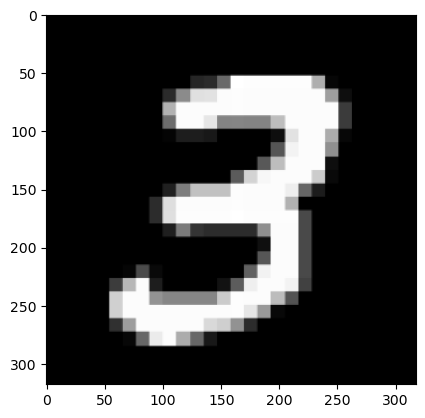

In [39]:
#The image iam giving is this 
testing_image="C:/Users/shrut/Downloads/MNIST_digit.png"
test_image= cv2.imread(input_img_path)
plt.imshow(test_image)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

(x_train , y_train), ( x_test , y_test)= mnist.load_data()

x_train = x_train/255
x_test = x_test/255

#seting up the layes of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50 ,activation = 'relu'),
    keras.layers.Dense(50 ,activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#training the neural network
model.fit(x_train , y_train , epochs=10)

y_predict = model.predict(x_test)

input_img_path="C:/Users/shrut/Downloads/MNIST_digit.png"
input_image= cv2.imread(input_img_path)
#chnage into greayscale and resize it to 28 x 28

grayscale= cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)


#input_img resize 
input_img_resize = cv2.resize(grayscale ,(28,28))

input_img_resize= input_img_resize/255

input_reshaped = np.reshape(input_img_resize,[1,28,28])

input_prediction = model.predict(input_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2921 - accuracy: 0.9160
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0713 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9864
Epoch 10/10
1/1 [==============================] - 0s 32ms/step
[[7.3995485e-15 7.